In [77]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [78]:
# Importing the dataset
dataset = pd.read_csv('/content/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [80]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [81]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [82]:
(dataset.isnull().sum().sort_values()*100/dataset.shape[0])

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [83]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

#**EDA**

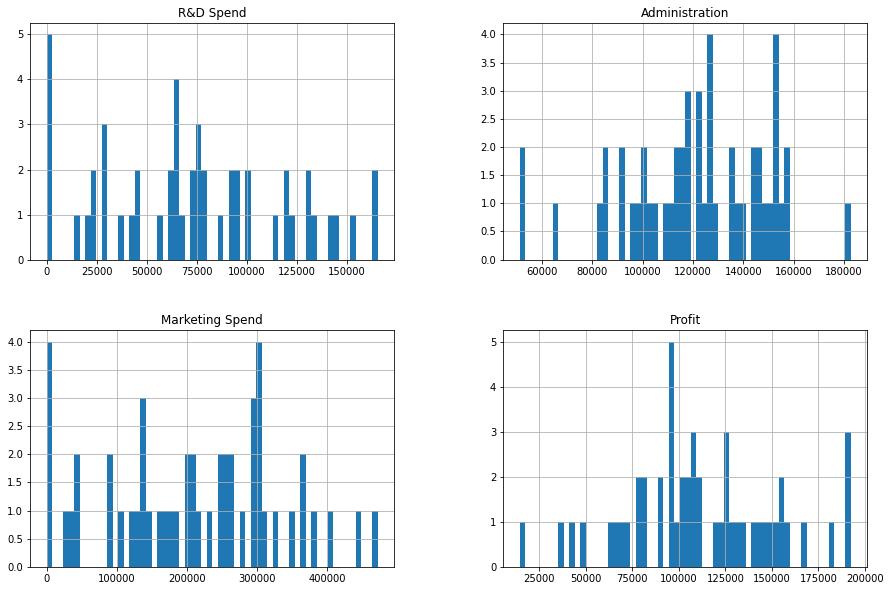

In [84]:
dataset.hist(bins=60,figsize=(15,10));   #Histgram of dataset

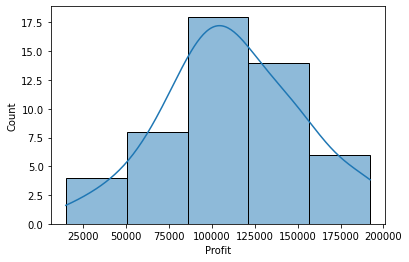

In [85]:
#Histgram on Profit
sns.histplot(dataset['Profit'],bins=5,kde=True);

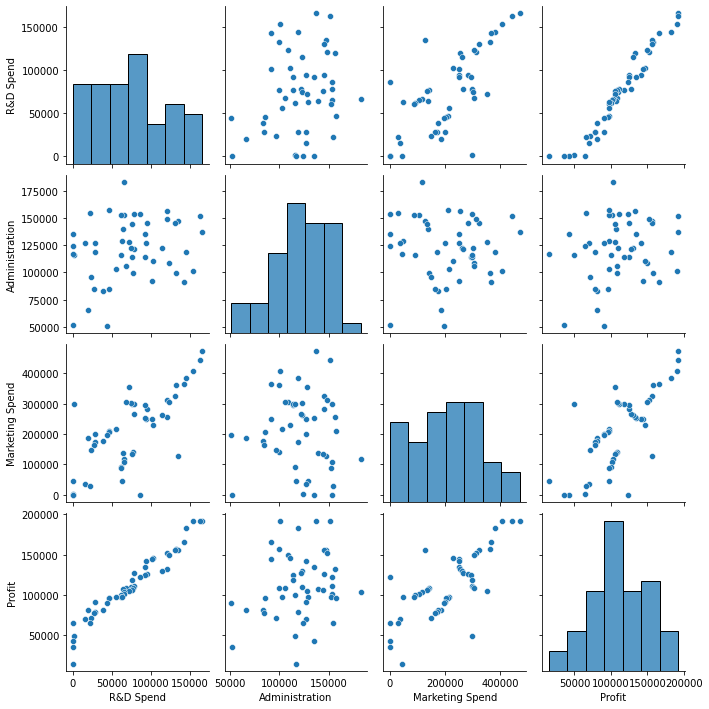

In [86]:
#Correlation  chart on different variables for comparision 
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 
sns.pairplot(dataset)

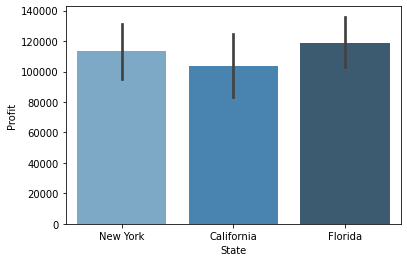

In [87]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=dataset, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

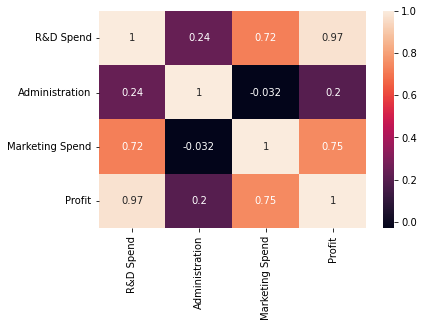

In [88]:
#gives positive & negative relation between categories
sns.heatmap(dataset.corr(), annot=True)

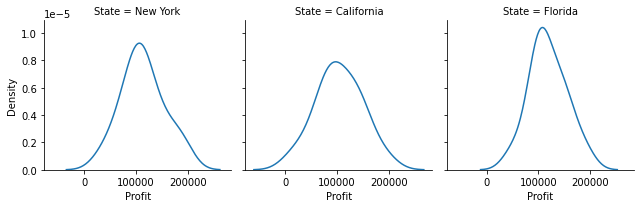

In [89]:
# spread of profit against state 
g=sns.FacetGrid(dataset, col='State')
g=g.map(sns.kdeplot,'Profit')

In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [91]:
dataset['State']=le.fit_transform(dataset['State'])

In [92]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [93]:
# spliting Dataset in Dependent & Independent Variables
x = dataset.iloc[:, :4].values
y = dataset.iloc[:, -1].values

In [95]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [96]:
y_pred=model.predict(x)

In [97]:
y_pred

array([192502.76441569, 189182.66604537, 182150.95841893, 173677.49061831,
       172142.80063001, 163561.20795755, 158138.91212502, 160023.60415542,
       151721.15820902, 154909.30674   , 135510.37351801, 135597.51300262,
       129138.8786306 , 127510.97126516, 149550.343104  , 146214.62758875,
       116937.89389796, 130170.79803397, 129015.06896831, 115613.22799121,
       116662.14204417, 117296.98376962, 114706.94317288, 109996.45606057,
       113341.03973173, 102259.49040895, 110600.45227028, 114385.5581763 ,
       101659.11459807, 101772.02860061,  99451.95339849,  97664.71273399,
        99023.17676297,  97914.37368769,  89060.01706124,  90488.40342916,
        75284.11129779,  89641.23303238,  69673.28063294,  83750.15676874,
        74836.31063948,  74800.89157002,  70640.77104461,  60142.13119236,
        64631.11685137,  47625.13881299,  56162.99623609,  46509.56395631,
        49146.57324723,  48234.27349509])

In [98]:
from sklearn.metrics import  r2_score
r2_score(y,y_pred)

0.9507462044842656

In [99]:
# dict=({"Actual Output": np.round(y),"Predicted Output": np.round(y_pred)})
# pred_df=pd.DataFrame.from_dict(dict,orient='index')
# pred_df=pred_df.transpose()

In [103]:
pred_df=pd.DataFrame({"Actual Output":y,"Predicted Output":y_pred})
pred_df

,Actual Output,Predicted Output
0,192261.83,192502.764416
1,191792.06,189182.666045
2,191050.39,182150.958419
3,182901.99,173677.490618
4,166187.94,172142.800630
5,156991.12,163561.207958
6,156122.51,158138.912125
7,155752.60,160023.604155
8,152211.77,151721.158209
9,149759.96,154909.306740
